## Análisis Exploratorio de Datos (EDA)
En esta sección, nos sumergiremos en los conjuntos de datos limpios para realizar un análisis exploratorio detallado. El objetivo principal será entender la distribución de los datos, identificar patrones y extraer información valiosa que pueda ser crucial para el desarrollo de modelos de recomendación.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tools
import warnings
warnings.filterwarnings("ignore")

## EDA del dataset user_reviews
En esta sección, desarrollamos el Análisis Exploratorio de los Datos del conjunto user_reviews que ya pasó por el proceso de Feature Engineering

In [3]:
df_user_reviews = pd.read_csv("df_user_reviews_FE.csv", encoding="utf-8")
df_user_reviews.head()

,user_id,item_id,reviews_helpful,reviews_recommend,year,sentiment_analysis,release_year
0,--000--,218230,No ratings yet,True,2014,2,2012
1,112asdasfasdasd,218230,No ratings yet,True,2013,1,2012
2,1234567890192837465,218230,No ratings yet,True,2014,1,2012
3,2828838282,218230,No ratings yet,True,2012,1,2012
4,2sd31,218230,No ratings yet,True,2013,1,2012


Revisamos los tipos de datos y cantidad de nulos si hay.

In [4]:
print(f"La cantidad de registros que hay son: {df_user_reviews.shape[0]}")
tools.ver_tipo_datos(df_user_reviews)

La cantidad de registros que hay son: 48802


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,item_id,[<class 'int'>],100.0,0.0,0
2,reviews_helpful,[<class 'str'>],100.0,0.0,0
3,reviews_recommend,[<class 'bool'>],100.0,0.0,0
4,year,[<class 'int'>],100.0,0.0,0
5,sentiment_analysis,[<class 'int'>],100.0,0.0,0
6,release_year,[<class 'str'>],100.0,0.0,0


Obtuvimos 48802 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, recordemos que en el ETL observamos datos faltantes en la columna 'reviews_date' donde la rellenamos con 'Formato inválido'.  

#### Columnas "sentiment_analysis" y "reviews_recommend"

Exploraremos las columnas 'sentiment_analysis' y 'reviews_recommend'.

In [5]:
tools.resumen_porcentaje(df_user_reviews, "sentiment_analysis")


,Cantidad,Porcentaje
sentiment_analysis,,
1,29957,61.38
2,14649,30.02
0,4196,8.60


In [6]:
tools.resumen_porcentaje(df_user_reviews, "reviews_recommend")

,Cantidad,Porcentaje
reviews_recommend,,
True,43600,89.34
False,5202,10.66


De los registros de reviews casi el 62% de los reviews reflejan sentimientos neutrales, casi el 30% reflejan sentimientos positivos hacia el juego y menos del 9% refleja negativo. Pero en el 89% de los reviews se recomiendan los juegos que consumen.

En el siguiente código, buscaremos ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [7]:
# agrupamos por "sentiment_analysis" y "reviews_recommend"
df_agrupado = df_user_reviews.groupby(["sentiment_analysis", "reviews_recommend"])
# Cantidad de reviews en cada grupo
cant_grupo = df_agrupado.size()
# Porcentaje por cada grupo
porc_grupo = 100 * df_agrupado.size() / len(df_user_reviews)
# DataFrame con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cant_grupo,
    "Porcentaje": porc_grupo
})


sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1326    2.717102
                   True                   2870    5.880907
1                  False                  3420    7.007910
                   True                  26537   54.376870
2                  False                   456    0.934388
                   True                  14193   29.082824

Podemos visualizar que, en el porcentaje con respecto al total de los reviews, casi el 54% de los reviews que reflejan un sentimiento neutral recomienda el juego, por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo o sin muchos detalles pero que aún así el juego le gustó como para recomendarlo. 
Por otra parte, los comentarios que reflejaron un sentimiento negativo muestran que cerca del 6% aún recomienda el juego, lo que es algo contradictorio.

In [8]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_user_reviews['user_id'].unique())}")



Cantidad de usuarios únicos que opinaron: 22973


Un total de 22973 usuarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo más de un comentario.

## "year" en User Reviews
"year" representa el año en que los usuario realizaron la reseña.



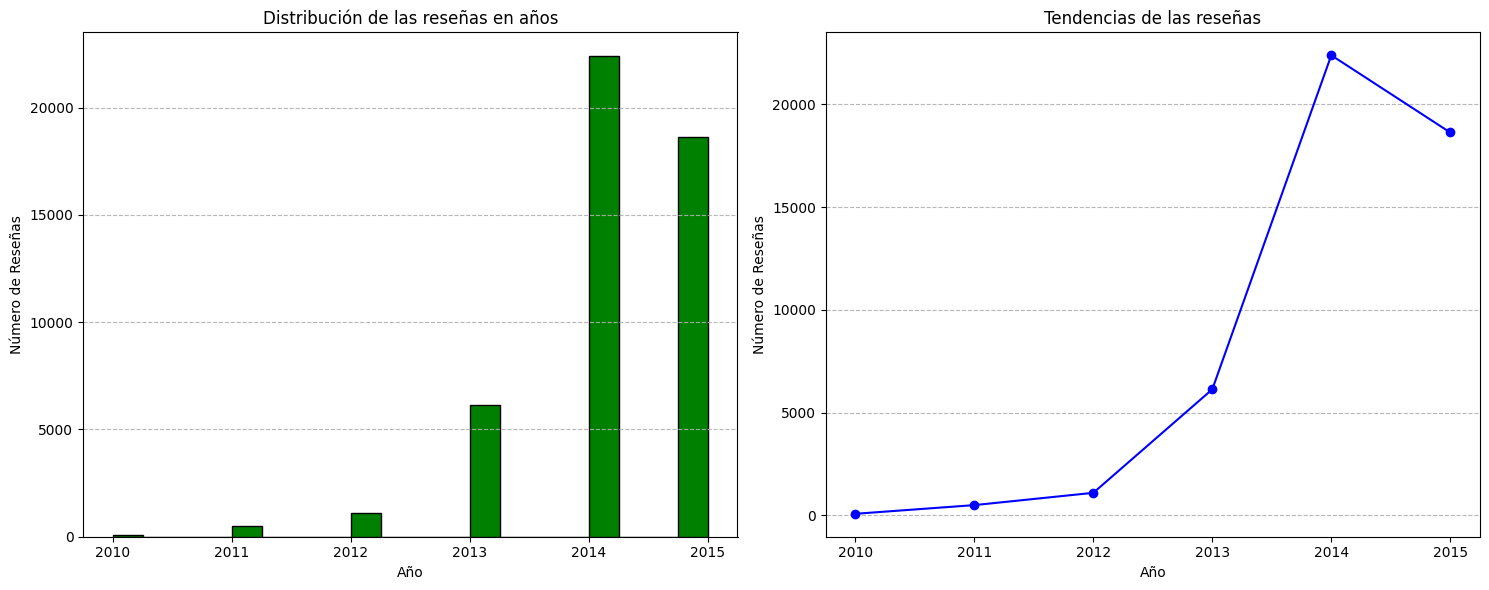

In [12]:
# Creamos subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
axs[0].hist(df_user_reviews["year"], bins=20, color='green', edgecolor='black')
axs[0].set_title("Distribución de las reseñas en años")
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Número de Reseñas")
axs[0].grid(axis="y", linestyle="--", alpha=0.9)

# Gráfico de líneas para las tendencias
trends = df_user_reviews["year"].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker="o", linestyle="-", color='blue')
axs[1].set_title("Tendencias de las reseñas")
axs[1].set_xlabel("Año")
axs[1].set_ylabel("Número de Reseñas")
axs[1].grid(axis="y", linestyle="--", alpha=0.9)

# Ajustamos el diseño
plt.tight_layout()

# Mostramos los gráficos
plt.show()

Los gráficos de distribución de años y tendencias presentan una perspectiva completa sobre la evolución temporal de las reseñas de usuarios en la plataforma Steam. Aquí algunos puntos clave para destacar:

Histograma de Distribución de reseñas:
La mayoría de las reseñas se concentran en los años más recientes, particularmente en 2014, 2015, y en menor medida, 2013. El año 2010 tiene la menor cantidad de reseñas, lo que sugiere un aumento significativo en la participación de usuarios con el tiempo y resalta la expansión y la creciente popularidad de la plataforma Steam en años más recientes.

Gráfico de Líneas de Tendencias:
La tendencia temporal muestra un crecimiento constante en el número de reseñas a lo largo de los años. La línea alcanza su punto máximo en 2014, indicando un pico en la actividad de reseñas en ese año.

La relación entre la distribución de años y la tendencia temporal confirma que, aunque hay un aumento general en las reseñas a lo largo del tiempo, hay años específicos que contribuyen de manera significativa a este crecimiento.

### EDA del dataset steam_games

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto steam_games que ya pasó por el proceso de ETL.

In [14]:
df_steam_games = pd.read_csv("steam_games_cleaned.csv", encoding="utf-8")
df_steam_games.head()

,genres,price,early_access,item_id,release_year,publisher,name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [15]:
# La cantidad de registros
print(f"La cantidad de registros que hay son: {df_steam_games.shape[0]}")
# Tipos de datos y existencias de nulos
tools.ver_tipo_datos(df_steam_games)

La cantidad de registros que hay son: 71551


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,price,[<class 'float'>],100.00,0.00,0
2,early_access,[<class 'bool'>],100.00,0.00,0
3,item_id,[<class 'int'>],100.00,0.00,0
4,release_year,[<class 'str'>],100.00,0.00,0
5,publisher,"[<class 'str'>, <class 'float'>]",99.97,0.03,22
6,name,[<class 'str'>],100.00,0.00,0
7,title,[<class 'str'>],100.00,0.00,0
8,developer,[<class 'str'>],100.00,0.00,0


Este conjunto de datos tiene 9 columnas y 71551 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género. Debemos tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

### Columnas "item_id", "name" y "title"
Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con 'item_id' podemos calcular la cantidad de juegos.

In [16]:
total_juegos = len(df_steam_games["item_id"].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")


El total de juegos que hay registrados son: 28850


Hay un total de 28850 juegos en la plataforma.



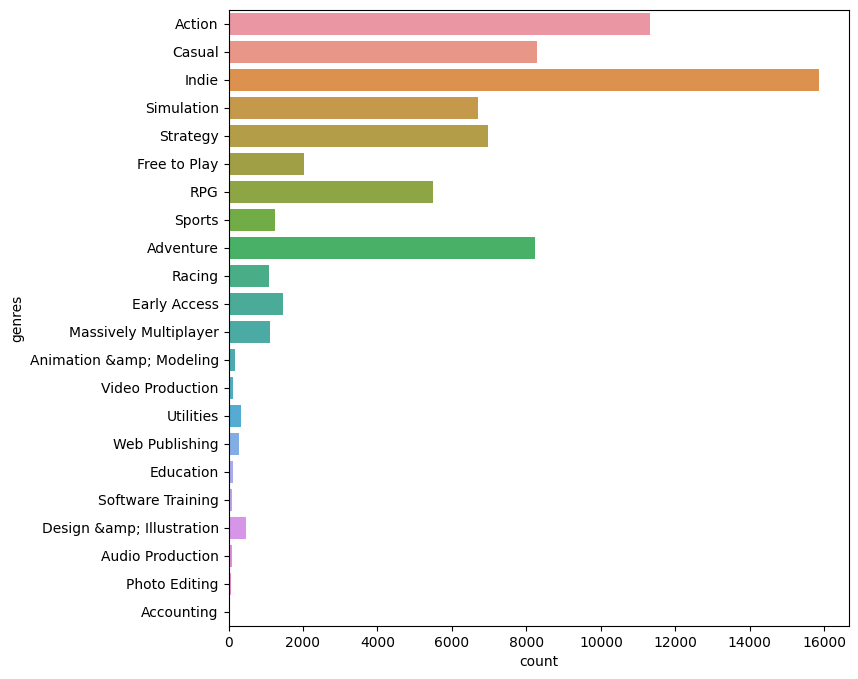

In [19]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_steam_games, y="genres", orient="H")
plt.show()

In [44]:
tools.resumen_porcentaje(df_steam_games, "genres")

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11319,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


Los juegos están categorizados mayormente en las categorías Indie, Action, Casual y Adventure. Recordemos que un juego puede tener más de un género asociado.

# Columna "release_year"

In [20]:
tools.resumen_porcentaje(df_steam_games, "release_year")[:10]

,Cantidad,Porcentaje
release_year,,
2017,24967,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2106,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91


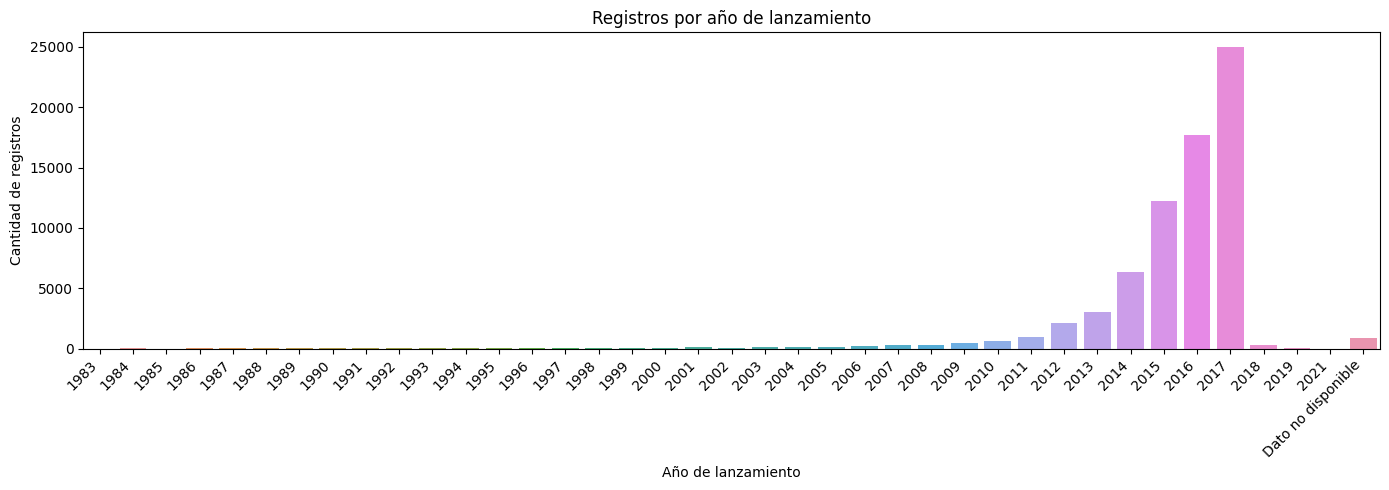

In [22]:
# Frecuencia de cada año
conteo_year = df_steam_games["release_year"].value_counts()

# Los valores para que "Datos no disponibles" queden al principio o al final
conteo_year = conteo_year.reindex(["Dato no disponible"] + list(conteo_year.index))
# Los valores por año
conteo_year = conteo_year.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_year.index, y=conteo_year.values)
plt.xlabel("Año de lanzamiento") ; plt.ylabel('Cantidad de registros') ; plt.title('Registros por año de lanzamiento')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
# Registros con valores numéricos en la columna 'release_year'
registros_numericos = df_steam_games[df_steam_games["release_year"].str.isnumeric()]
# Convierte la columna 'release_anio' a valores enteros
registros_numericos["release_year"] = registros_numericos["release_year"].astype(int)
# Filtra los registros con años de lanzamiento antes de 2002
registros_antes_2002 = registros_numericos[registros_numericos["release_year"] < 2002]

print(f"Cantidad de registros antes de 2002: {len(registros_antes_2002)}")
print(f"Cantidad de registros 'Dato no disponible': {df_steam_games[df_steam_games['release_year'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2002: 679
Cantidad de registros 'Dato no disponible': 850


Se pueden ver 679 juegos lanzados en años anteriores al 2002. Eso podría considerarse como un error porque la plataforma se lanzó en el 2003. Por otra parte, se observan 850 juegos sin la fecha disponible debido a que no estaba especificada o estaba en un formato incorrecto. Luego, podemos ver el crecimiento constante y lento hasta 2012 y luego crece más rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

## Columnas 'publisher' y 'developer'

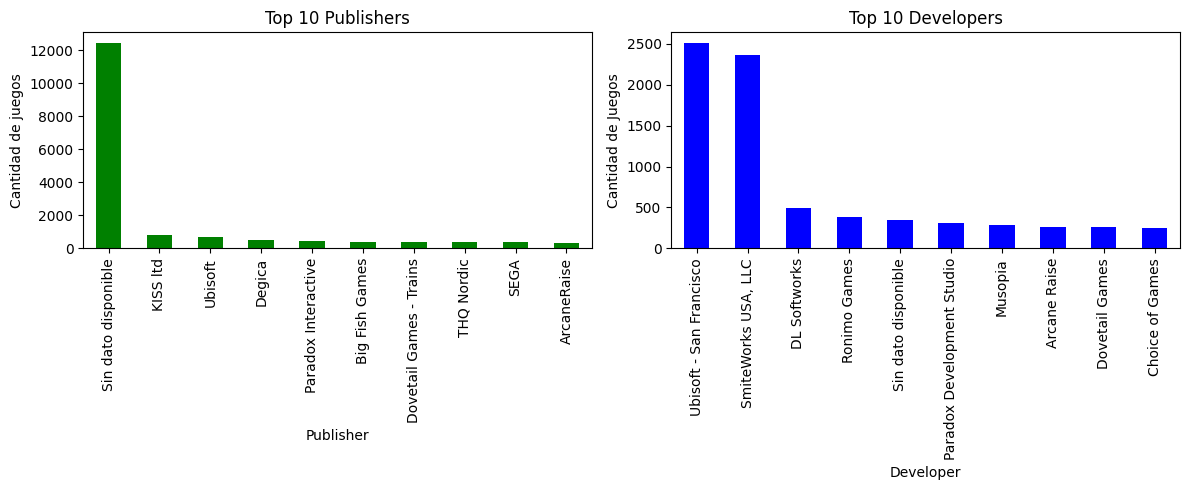

In [24]:
# Cantidad de juegos por publisher
conteo_publisher = df_steam_games["publisher"].value_counts()

# Cantidad de juegos por developer
conteo_developer = df_steam_games["developer"].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind="bar", color="green")
plt.xlabel("Publisher") ; plt.ylabel("Cantidad de juegos") ; plt.title("Top 10 Publishers")

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind="bar", color="blue")
plt.xlabel("Developer") ; plt.ylabel("Cantidad de Juegos") ; plt.title("Top 10 Developers")

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publicistas de juegos, la mayor cantidad no dispone del dato y en el caso de los desarrolladores, Ubisoft y SmiteWorks son los desarrolladores que más juegos han desarrollado para la plataforma.

## Columna "Price"

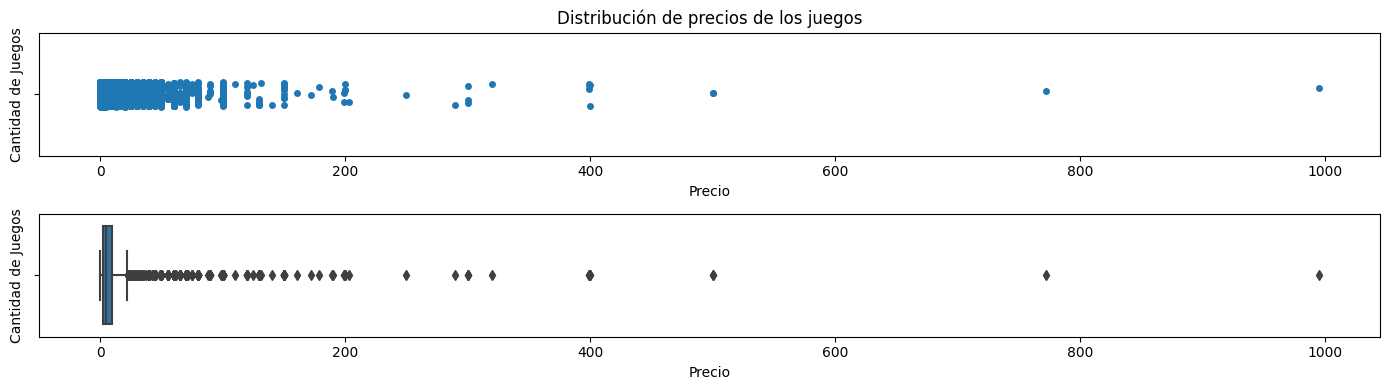

In [26]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_steam_games.groupby("item_id")["price"].unique().reset_index().explode("price")
df_precio_unicos = precio_unicos["price"]

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax1)
ax1.set_xlabel("Precio") ; ax1.set_ylabel("Cantidad de Juegos") ; ax1.set_title("Distribución de precios de los juegos")

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax2)
ax2.set_xlabel("Precio") ; ax2.set_ylabel("Cantidad de Juegos")

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [27]:
estadisticas = df_precio_unicos.astype(float).describe()
print(f"El precio medio (mediana) de los juegos es de: {estadisticas[5]}")
print(f"El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}")
print(f"El 75% de los juegos tienen un precio menor de: {estadisticas[6]}")
tools.bigote_max(pd.DataFrame(df_precio_unicos.astype(float))["price"])

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.62
El 75% de los juegos tienen un precio menor de: 9.99
El bigote superior de la variable price se ubica en: 21.99
Hay 1746 valores atípicos en la variable price


Podemos visualizar que casi el 50% de los juegos tienen precios entre 0 y los 4.99 dólares y el 75% de los juegos tienen precios inferior a los 9.99 dolares. Se Observan 1746 valores que se pueden considerar atípicos, con precios superior a los 21.99 dolares, pero sin dudas hay algunos juegos de más de 250 dolares que pueden considerarse errores en los precios.

## EDA del dataset users_items
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto users_items que ya pasó por el proceso de ETL.

In [29]:
df_users_items = pd.read_csv("users_items_cleaned.csv", encoding="utf-8")
df_users_items.head()

,item_id,item_name,items_count,user_id,user_url,played_hours
0,10,Counter-Strike,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.10
1,30,Day of Defeat,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.12
2,300,Day of Defeat: Source,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,78.88
3,240,Counter-Strike: Source,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30.88
4,3830,Psychonauts,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,5.55


In [30]:
# Cantidad de registros
print(f"La cantidad de registros que hay son: {df_users_items.shape[0]}")
# Tipos de datos y existencias de nulos
tools.ver_tipo_datos(df_users_items)

La cantidad de registros que hay son: 3246375


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,items_count,[<class 'int'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,user_url,[<class 'str'>],100.0,0.0,0
5,played_hours,[<class 'float'>],100.0,0.0,0


Este conjunto de datos tiene 6 columnas y 3246375 registros. Recordemos que contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.


## Columna 'items_count'
Esta columna indica la cantidad de juegos que consumen o compraron alguna vez los usuarios.

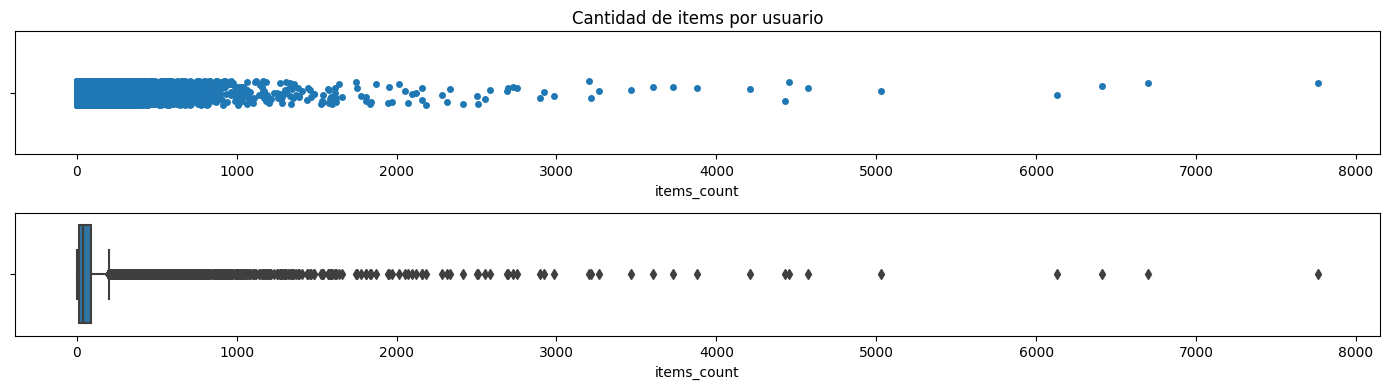

In [31]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_users_items.groupby("user_id")["items_count"].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values("items_count", ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x="items_count", ax=ax1)
ax1.set_xlabel("items_count") ; ax1.set_title('Cantidad de items por usuario')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x="items_count", ax=ax2)
ax2.set_xlabel("items_count")

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [33]:
estadisticas = items_count_user["items_count"].astype(float).describe()
print(f"El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}")
print(f"El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}")
print(f"El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}")
tools.bigote_max(items_count_user.astype(float)["items_count"])

El precio medio (mediana) de los juegos es de: 42.0
El precio promedio (mean) de los juegos es de: 74.41
El 75% de los juegos tienen un precio menor de: 90.0
El bigote superior de la variable items_count se ubica en: 201.0
Hay 4727 valores atípicos en la variable items_count


<Figure size 1400x500 with 0 Axes>

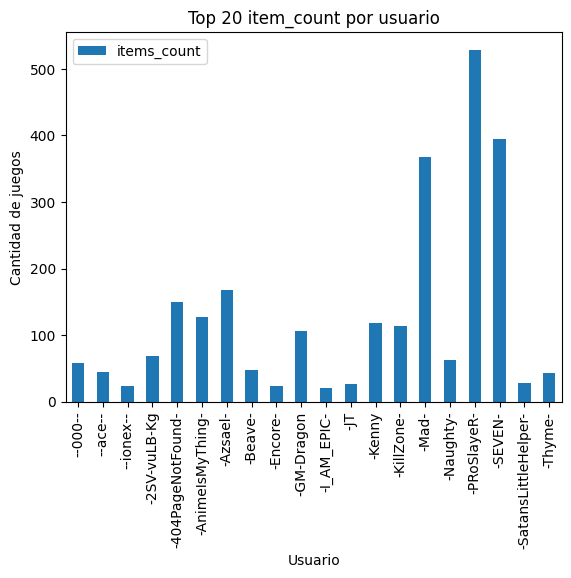

In [34]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind="bar")
plt.xlabel("Usuario") ; plt.ylabel("Cantidad de juegos") ; plt.title("Top 20 item_count por usuario")
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido ronda los 8000 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4727 usuarios que hay adquirido más de 196 items que podrían considerarse como atípicos.

## Variables a usar en el modelo de recomendación
Para el modelo de recomndación se busca como resultado la recomendación un una lista de 5 juegos a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, revisaremos los dataFrame df_reviews y df_items analizados anteriormente.

In [35]:
df_user_reviews = pd.read_csv("df_user_reviews_FE.csv", encoding="utf-8")
df_users_items = pd.read_csv("users_items_cleaned.csv", encoding="utf-8")

In [36]:
df_user_reviews.head()

,user_id,item_id,reviews_helpful,reviews_recommend,year,sentiment_analysis,release_year
0,--000--,218230,No ratings yet,True,2014,2,2012
1,112asdasfasdasd,218230,No ratings yet,True,2013,1,2012
2,1234567890192837465,218230,No ratings yet,True,2014,1,2012
3,2828838282,218230,No ratings yet,True,2012,1,2012
4,2sd31,218230,No ratings yet,True,2013,1,2012


In [37]:
df_users_items.head()

,item_id,item_name,items_count,user_id,user_url,played_hours
0,10,Counter-Strike,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.10
1,30,Day of Defeat,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.12
2,300,Day of Defeat: Source,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,78.88
3,240,Counter-Strike: Source,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30.88
4,3830,Psychonauts,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,5.55


Con los datos disponible, crearemos una variable llamada puntaje para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. Recordar que el análisis de sentimiento está calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información buscaremos hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

1 si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
2 si el análisis de sentimiento es neutral y no es recomendado (False)
3 si el análisis de sentimiento es neutral pero es recomendado (True)
4 si el análisis de sentimiento es positivo y no es recomendado (False)
5 si el análisis de sentimiento es positivo y es recomendado (True)
Con esto, armaremos la siguiente función:

In [38]:
def calcula_rating(fila):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if fila["sentiment_analysis"] == 0 and not fila["reviews_recommend"]:
        return 1
    elif fila["sentiment_analysis"] == 0 and fila["reviews_recommend"]:
        return 1
    elif fila["sentiment_analysis"] == 1 and not fila["reviews_recommend"]:
        return 2
    elif fila["sentiment_analysis"] == 1 and fila["reviews_recommend"]:
        return 3
    elif fila["sentiment_analysis"] == 2 and not fila["reviews_recommend"]:
        return 4
    elif fila["sentiment_analysis"] == 2 and fila["reviews_recommend"]:
        return 5
    else:
        return None

Aplicamos esta función en una nueva columna sobre el dataframe df_user_reviews

In [39]:
df_user_reviews["puntaje"] = df_user_reviews.apply(calcula_rating, axis=1)
df_user_reviews.head()

,user_id,item_id,reviews_helpful,reviews_recommend,year,sentiment_analysis,release_year,puntaje
0,--000--,218230,No ratings yet,True,2014,2,2012,5
1,112asdasfasdasd,218230,No ratings yet,True,2013,1,2012,3
2,1234567890192837465,218230,No ratings yet,True,2014,1,2012,3
3,2828838282,218230,No ratings yet,True,2012,1,2012,3
4,2sd31,218230,No ratings yet,True,2013,1,2012,3


Creamos un nuevo dataframe dejando solo las columnas "user_id", "item_id" y "puntaje" y se reserva.

In [40]:
df1 = df_user_reviews[["user_id", "item_id", "puntaje"]]
df1.head(2)

,user_id,item_id,puntaje
0,--000--,218230,5
1,112asdasfasdasd,218230,3


Creamos otro datafrma que contenga unicamente los "item_id" y los nombres de los juego.

In [41]:
df2 = df_users_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head()

Hay un total de 10050 juegos


,item_id,item_name
0,10,Counter-Strike
1,30,Day of Defeat
2,300,Day of Defeat: Source
3,240,Counter-Strike: Source
4,3830,Psychonauts


Luego fusionaremos los dos dataFrames.

In [42]:
df = df1.merge(df2, on="item_id", how="left")
df

,user_id,item_id,puntaje,item_name
0,--000--,218230,5,PlanetSide 2
1,112asdasfasdasd,218230,3,PlanetSide 2
2,1234567890192837465,218230,3,PlanetSide 2
3,2828838282,218230,3,PlanetSide 2
4,2sd31,218230,3,PlanetSide 2
...,...,...,...,...
48797,yougotblehed,315340,2,A.R.E.S. Extinction Agenda EX
48798,yougoyu,424370,3,Wolcen: Lords of Mayhem
48799,zayyntt,479260,3,Cuties
48800,zayyntt,463550,3,Neon Space ULTRA


Podemos observar algunos juegos a los cuales los usuarios les hicieron comentarios, pero que no están en el dataframe df_reviews. Verificamos los tipos de datos y la cantidad de nulos y luego revisaremos las filas con nulos.

In [43]:
tools.ver_tipo_datos(df)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,item_id,[<class 'int'>],100.00,0.00,0
2,puntaje,[<class 'int'>],100.00,0.00,0
3,item_name,"[<class 'str'>, <class 'float'>]",90.57,9.43,4601


In [45]:
# revisamos los reviews sin nombres de juegos en `df`
sin_juegos = df[df.isnull().any(axis=1)]
# Calculamos la cantidad de juegos en esta situación
sin_juegos

,user_id,item_id,puntaje,item_name
8405,-SEVEN-,440,3,NaN
8406,-Ultrix,440,5,NaN
8407,-_PussyDestroyer_-,440,3,NaN
8408,0132489,440,3,NaN
8409,0432-026-no,440,5,NaN
...,...,...,...,...
48764,teerakron,465020,3,NaN
48767,thekangacommando,338163,2,NaN
48773,tomdabomb115,335800,5,NaN
48784,unkowncode94,268090,5,NaN


Decidimos borrarlos del conjunto de datos.

In [46]:
# Borramos los nulos
df = df.dropna(subset=["item_name"])
# Se cuentan los registros que quedan
print(f"Quedan {df.shape[0]} registros")
# Se verifican los tipo de dato y nulos
tools.ver_tipo_datos(df)

Quedan 44201 registros


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,item_id,[<class 'int'>],100.0,0.0,0
2,puntaje,[<class 'int'>],100.0,0.0,0
3,item_name,[<class 'str'>],100.0,0.0,0


Creamos un último dataframe con las columnas necesarias para los modelos de recomendación.

In [47]:
df_recomendacion = df[['user_id', 'item_name', 'puntaje']]
df_recomendacion.head()

,user_id,item_name,puntaje
0,--000--,PlanetSide 2,5
1,112asdasfasdasd,PlanetSide 2,3
2,1234567890192837465,PlanetSide 2,3
3,2828838282,PlanetSide 2,3
4,2sd31,PlanetSide 2,3


En el siguiente gráfico, podemos ver la cantidad de reviews distribuidos por el puntaje adoptado.

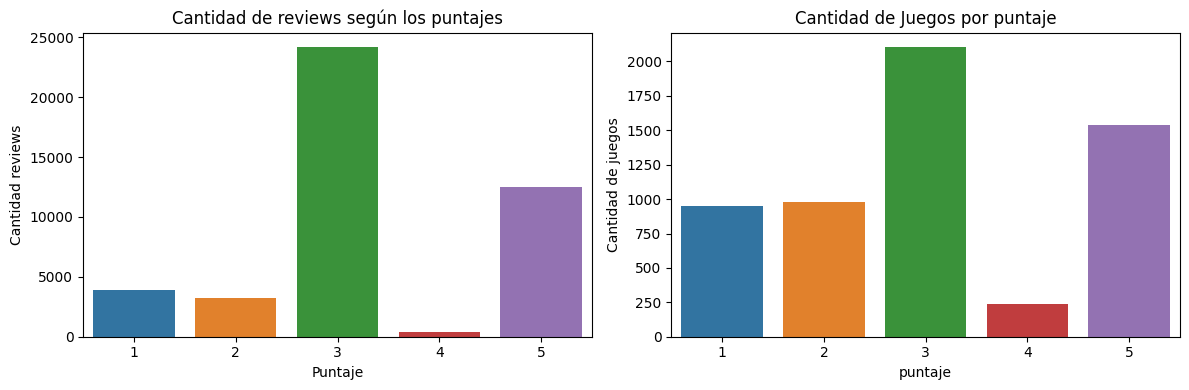

In [54]:
# Agrupa las calificaciones por rating
ratings_count = df_recomendacion["puntaje"].value_counts().reset_index()
ratings_count.columns = ["puntaje", "count"]
# Agrupa los juegos únicos por rating
unique_games_per_puntaje = df.groupby("puntaje")["item_name"].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x="puntaje", y="count", ax=axes[0])
axes[0].set_title("Cantidad de reviews según los puntajes") ; axes[0].set_xlabel("Puntaje") ; axes[0].set_ylabel("Cantidad reviews")

# Segundo subplot
sns.barplot(data=unique_games_per_puntaje, x="puntaje", y='item_name', ax=axes[1])
axes[1].set_title("Cantidad de Juegos por puntaje") ; axes[1].set_xlabel("puntaje") ; axes[1].set_ylabel("Cantidad de juegos")

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [55]:
# Cantidades de review por rating
tools.resumen_porcentaje(df_recomendacion, 'puntaje')


,Cantidad,Porcentaje
puntaje,,
3,24156,54.65
5,12457,28.18
1,3906,8.84
2,3252,7.36
4,430,0.97


In [57]:
# Cantidad de juegos por puntaje
unique_games_per_puntaje

,puntaje,item_name
0,1,953
1,2,980
2,3,2103
3,4,240
4,5,1538


Podemos ver en la gráfica de la derecha que la mayoría de las reviews tienen un puntaje' de 3, correspondiente a sentimientos neutrales pero que recomiendan el juego, siendo 24156 reviews (el 54% de los comentarios) en esta categoría. Le siguen 12457 reviews con sentimientos positivos y que recomiendan los juegos comentados. Finalmente, se observan menos de 4000 comentarios con sentimiento negativo. Por otro lado, en la gráfica de la izquierda se pueden observa cerca de 1550 juegos recomendados.

Finalmente, se guarda el dataFrame a utilizar en el modelo de recomnedación.

In [58]:
df_recomendacion.to_csv("df_recomendacion.csv", index=False, encoding="utf-8")
print(f"Se guardado como 'df_recomendacion.csv'")

Se guardado como 'df_recomendacion.csv'
